In [1]:
#Q2
import numpy as np 
#Initialisation :
T_e= 1
T = 100
sigma_Q =1
sigma_px = 30
sigma_py = 30

F=np.eye(4,4)+np.array([[0,T_e,0,0],[0,0,0,0],[0,0,0,T_e],[0,0,0,0]])
H = np.zeros((2,4)) + np.array([[1,0,0,0],[0,0,1,0]])
R = np.zeros((2,2)) + np.array([[sigma_px**2,0],[0,sigma_py**2]])
def construct_Q(T_e) : 
    Q=np.zeros((4,4))
    Q[0][0] = (T_e**3)*(1/3)
    Q[2][2] = (T_e**3)*(1/3)
    Q[1][1] = T_e
    Q[3][3] = T_e
    Q[0][1] = (T_e**2)*(1/2)
    Q[1][0] = (T_e**2)*(1/2)
    Q[3][2] = (T_e**2)*(1/2)
    Q[2][3] = (T_e**2)*(1/2)
    return sigma_Q*Q

Q = construct_Q(T_e=T_e)
x_init = np.array([3,40,-4,20])
x_init = np.array([x_init]).T

x_kalm = x_init
P_kalm = np.eye(4,4)
x_init[1][0]

40

In [2]:
#Q3 et Q4
def creer_trajectoire(F,Q,x_init,T):
    X=np.zeros((4,T))
    X[0][0]=x_init[0][0]
    X[1][0]=x_init[1][0]
    X[2][0]=x_init[2][0]
    X[3][0]=x_init[3][0]
    X_k=x_init
    for i in range(1,100):
        X_k=F@X_k+np.random.multivariate_normal(np.zeros(4),Q)
        X[0][i]=X_k[0][0]
        X[1][i]=X_k[1][0]
        X[2][i]=X_k[2][0]
        X[3][i]=X_k[3][0]
    return(X)

vecteur_x=creer_trajectoire(F,Q,x_init,T)

def creer_observations(H,R,vecteur_x,T):
    Y_k= np.matmul(H, vecteur_x)
    Y_k+=np.random.multivariate_normal(np.zeros(2),R,T).T
    return(Y_k)

vecteur_y=creer_observations(H,R,vecteur_x,T)

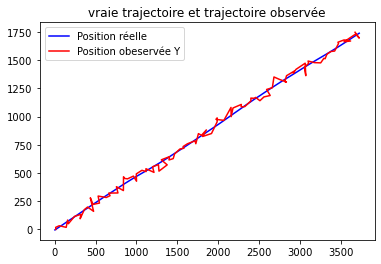

In [3]:
# Q5 
import matplotlib.pyplot as plt
plt.plot(vecteur_x[0],vecteur_x[2],label='Position réelle',color='blue')
plt.plot(vecteur_y[0],vecteur_y[1],label='Position obeservée Y',color='red')
plt.title('vraie trajectoire et trajectoire observée')
plt.legend()
plt.show()

In [4]:
#Q6
def filtre_de_kalman(F,Q,H,R,y_k,x_kalm_prec,P_kalm_prec):
    #retourne x_kalm_k = x_k|k, P_kalm_k

    # Partie prediction : on calcul x_k|k-1 et P_k|k-1 :
    P_k_k_moins_1 = np.matmul(F,np.matmul(P_kalm_prec,F.T)) + Q
    x_k_k_moins_1 = np.matmul(F,x_kalm_prec) 
    
    # partie update : on calcul P_k|k et x_k|k :
    # calcul du gain de Kalman K :  
    truc_inv = np.linalg.inv( np.matmul(H,np.matmul(P_k_k_moins_1,H.T)) + R ) # uniquement pour simplifier l'expression qui suit
    K = np.matmul(P_k_k_moins_1,np.matmul(H.T,truc_inv))
    # calcul de P_k|k : 
    I = np.eye(P_kalm_prec.shape[1])
    P_kalm_k = np.matmul((I - np.matmul(K,H)),P_k_k_moins_1) 
    # Calcul de x_k|k
    x_kalm_k = x_k_k_moins_1 + np.matmul(K,(y_k - np.matmul(H,x_k_k_moins_1) ))
    return [x_kalm_k,P_kalm_k]



def y_k(k):
    y_k = vecteur_y[:,k]
    #[x_kalm_k,P_kalm_k] = filtre_de_kalman(F,Q,H,R,y_k,)
    return y_k

In [5]:
# Q7
X_est=np.zeros((4,T))
x_kalm_prec = x_init
P_kalm_prec = P_kalm
X_est[:,0] = x_init.T
for k in range(1,T) :
    y_k = np.array([vecteur_y[:,k]]).T
    [x_kalm_k,P_kalm_k] = filtre_de_kalman(F,Q,H,R,y_k,x_kalm_prec,P_kalm_prec)

    X_kalm_k = x_kalm_k.reshape(-1)
    X_est[:,k] = X_kalm_k
    print("X_kalm_k : ") 
    print(X_kalm_k)
    print("y_k : ")
    print(y_k)
    x_kalm_prec = x_kalm_k
    P_kalm_prec = P_kalm_k

X_kalm_k : 
[42.92152861 39.94955411 16.00742221 20.00477142]
y_k : 
[[12.65399367]
 [18.87027475]]
X_kalm_k : 
[82.64257245 39.83026791 35.98584048 19.99101463]
y_k : 
[[55.76035237]
 [32.88562396]]
X_kalm_k : 
[122.85497895  39.98134174  55.21553156  19.69003466]
y_k : 
[[141.13028183]
 [ 18.80617938]]
X_kalm_k : 
[162.64873403  39.92240412  75.23288776  19.79287541]
y_k : 
[[158.11786345]
 [ 83.13884224]]
X_kalm_k : 
[200.30145822  39.33089556  92.13208163  19.03874379]
y_k : 
[[168.06712337]
 [ 51.03558242]]
X_kalm_k : 
[239.95212223  39.40232788 111.62905591  19.14110681]
y_k : 
[[242.95359248]
 [115.93018434]]
X_kalm_k : 
[284.75442478  40.46350109 131.175608    19.22078268]
y_k : 
[[321.64823383]
 [133.94569892]]
X_kalm_k : 
[323.1081693   40.09082772 141.76656883  17.69638653]
y_k : 
[[311.72366179]
 [ 95.1989822 ]]
X_kalm_k : 
[363.11527539  40.0772835  162.36976336  18.16664062]
y_k : 
[[362.73341293]
 [175.62799595]]
X_kalm_k : 
[403.08547608  40.06115155 184.11683664  18.70

In [6]:
def H(X):
    H  = np.array([ 
    [ (-X[2][0])/(X[0][0]**2+X[2][0]**2), 0, X[0][0]/(X[0][0]**2+X[2][0]**2), 0 ], 
    [ X[0][0]/np.sqrt(X[0][0]**2+X[2][0]**2), 0, X[2][0]/np.sqrt(X[0][0]**2+X[2][0]**2),0 ]
    ])
    return H 
X=np.array([[1,2,3,4]]).T
p = H(X)
p
# Jaco=np.array([ 
#     [ (-vecteur_x[2][k])/(vecteur_x[0][k]**2+vecteur_x[2][k]**2), 0, vecteur_x[0][k]/(vecteur_x[0][k]**2+vecteur_x[2][k]**2), 0 ], 
#     [ vecteur_x[0][k]/np.sqrt(vecteur_x[0][k]**2+vecteur_x[2][k]**2), 0, vecteur_x[2][k]/np.sqrt(vecteur_x[0][k]**2+vecteur_x[2][k]**2),0 ]
#     ])
# k


array([[-0.3       ,  0.        ,  0.1       ,  0.        ],
       [ 0.31622777,  0.        ,  0.9486833 ,  0.        ]])

In [32]:
# Q3 
sigma_angle = (np.pi)/180
sigma_dist = 10

R = np.zeros((2,2))
R[0][0] = sigma_angle**2
R[1][1] = sigma_dist**2
T=100


def creer_observations_radar(R,vecteur_x,T):
    resu= np.zeros((2,T))
    for i in range (T):
        resu[:,i]+=np.array([np.arctan(vecteur_x[2][i]/vecteur_x[0][i]),np.sqrt(vecteur_x[0][i]**2+vecteur_x[2][i]**2)]).T       
        resu[:,i]+=np.random.multivariate_normal(np.zeros(2),R).T
    
    return(resu)

vecteur_y = creer_observations_radar(R,vecteur_x,T)

def theta(x_k):
    return np.arctan(x_k[2]/x_k[0])
def r(x_k):
    return np.sqrt(x_k[0]**2+x_k[2]**2)
def g(x_k):
    return np.array([theta(x_k),r(x_k)]).T
# #test vecteury
# def creer_observations_radar(R,vecteur_x,T):
#     resu=np.zeros((2,T))
#     resu[:,0]=np.array([0,0]).T
#     for k in range(1,T):
#         Jaco=np.array([[-vecteur_x[2][k]/(vecteur_x[0][k]**2+vecteur_x[2][k]**2),0,vecteur_x[0][k]/(vecteur_x[0][k]**2+vecteur_x[2])[k]**2,0],[vecteur_x[0][k]/np.sqrt(vecteur_x[0][k]**2+vecteur_x[2][k]**2),0,vecteur_x[2][k]/np.sqrt(vecteur_x[0][k]**2+vecteur_x[2][k]**2),0]])
#         mupredi=F@vecteur_x[:,k-1]
#         resu[:,k]= Jaco@vecteur_x[:,k]
#         resu[:,k]+=np.random.multivariate_normal(np.zeros(2),R)
#         resu[:,k]-=Jaco@mupredi
#         resu[:,k]+=resu[:,k-1]
#     return(resu)

vecteur_y

array([[-9.08511826e-01,  3.32475606e-01,  3.80825618e-01,
         3.97610137e-01,  4.22312548e-01,  4.13908113e-01,
         4.28228786e-01,  4.24288513e-01,  4.24743608e-01,
         4.48731190e-01,  4.40154560e-01,  4.34955055e-01,
         3.87885416e-01,  4.60166143e-01,  4.62626982e-01,
         4.36129178e-01,  4.24230872e-01,  4.62350987e-01,
         4.33616446e-01,  4.44892271e-01,  4.26608890e-01,
         4.70292289e-01,  4.63634687e-01,  4.51393633e-01,
         4.38089579e-01,  4.58574982e-01,  4.46307781e-01,
         4.40221018e-01,  4.51241960e-01,  4.20964012e-01,
         4.42217224e-01,  4.32029085e-01,  4.28327763e-01,
         4.35777807e-01,  4.65829661e-01,  4.17253134e-01,
         4.22298151e-01,  4.13412181e-01,  4.51641633e-01,
         4.09779024e-01,  4.13561975e-01,  4.01151866e-01,
         4.48540147e-01,  3.70270405e-01,  4.39956731e-01,
         4.18313168e-01,  4.17664135e-01,  4.16596044e-01,
         4.54607445e-01,  4.47634947e-01,  4.34692131e-0

In [8]:
#Q4
# il faut parler 

In [33]:
#Q6
def filtre_de_kalman_radar(F,Q,R,y_k,x_kalm_prec,P_kalm_prec) :
    #retourne x_kalm_k = x_k|k, P_kalm_k

    # Partie prediction : on calcul x_k|k-1 et P_k|k-1 :
    P_k_k_moins_1 = F@P_kalm_prec@(F.T) + Q
    x_k_k_moins_1 = F@x_kalm_prec
    # partie update : on calcul P_k|k et x_k|k :

    # On construit H(x_k|k-1) : 
    H_new = H(x_k_k_moins_1)
    # calcul du gain de Kalman K :  
    truc_inv = np.linalg.inv( H_new@P_k_k_moins_1@(H_new.T) + R ) # uniquement pour simplifier l'expression qui suit
    K = P_k_k_moins_1@(H_new.T)@truc_inv
    # calcul de P_k|k : 
    I = np.eye(P_kalm_prec.shape[1])
    P_kalm_k = (I - K@H_new)@P_k_k_moins_1
    # Calcul de x_k|k
    x_kalm_k = x_k_k_moins_1 + K@(y_k - g(x_k_k_moins_1).T)

    return [x_kalm_k,P_kalm_k]


X_est=np.zeros((4,T))
x_kalm_prec = x_init
P_kalm_prec = P_kalm
X_est[:,0] = x_init.T
for k in range(1,T) :
    y_k = np.array([vecteur_y[:,k]]).T
    [x_kalm_k,P_kalm_k] = filtre_de_kalman_radar(F,Q,R,y_k,x_kalm_prec,P_kalm_prec)

    X_kalm_k = x_kalm_k.reshape(-1)
    X_est[:,k] = X_kalm_k
    print("X_kalm_k : ") 
    print(X_kalm_k)
    print("y_k : ")
    print(y_k)
    x_kalm_prec = x_kalm_k
    P_kalm_prec = P_kalm_k
    

X_kalm_k : 
[42.97640652 39.98483276 15.07943382 19.40820745]
y_k : 
[[ 0.33247561]
 [30.83092898]]
X_kalm_k : 
[82.3396878  39.71162603 33.56774163 18.78453071]
y_k : 
[[ 0.38082562]
 [76.02470217]]
X_kalm_k : 
[123.77863099  40.43239623  52.55069946  18.7898862 ]
y_k : 
[[  0.39761014]
 [143.86888411]]
X_kalm_k : 
[164.96892162  40.61753379  72.72465567  19.38018325]
y_k : 
[[  0.42231255]
 [184.463604  ]]
X_kalm_k : 
[207.33142263  41.13479377  92.14693412  19.30877071]
y_k : 
[[  0.41390811]
 [230.60749928]]
X_kalm_k : 
[242.12786232  39.53780998 109.37939776  18.86580471]
y_k : 
[[  0.42822879]
 [252.52463683]]
X_kalm_k : 
[277.73540389  38.65079007 126.08861238  18.32774912]
y_k : 
[[  0.42428851]
 [296.73056115]]
X_kalm_k : 
[315.59541377  38.49359702 143.56856625  18.09961441]
y_k : 
[[  0.42474361]
 [344.77119731]]
X_kalm_k : 
[349.12323523  37.31510329 162.50226463  18.48832041]
y_k : 
[[  0.44873119]
 [377.56180178]]
X_kalm_k : 
[392.1684958   38.55221171 184.00162613  19.16

In [17]:
X_test = np.zeros((2,T))
for k in range(T):
    X_test[:,k] = g(X_est[:,k]).T
X_test.shape

(2, 100)

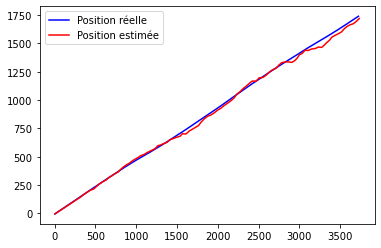

In [35]:
# Q7 

  
import matplotlib.pyplot as plt
plt.plot(vecteur_x[0],vecteur_x[2],label='Position réelle',color='blue')
plt.plot(X_est[0],X_est[2],label='Position estimée',color='red')
#plt.plot(vecteur_y[0],vecteur_y[1],label='Position obeservée Y',color='red')
#plt.title('vraie trajectoire et trajectoire observée')
plt.legend()
plt.show()